In [3]:
#!pip install PySCeS
#!pip install stochpy

In [4]:
import stochpy

In [5]:
def doSequentialSim(smod,n_generations,cell_division_times):    
    for i in range(1,n_generations):     
        ### divide each species between two daughter cells ###        
        for j in range(0,len(smod.data_stochsim.species_labels)): 
            species_amount = smod.SSA.sim_output[-2][1:][j]     
            if species_amount:
                smod.settings.X_matrix[j] = np.random.binomial(n=species_amount
                                                               ,p=0.5,size=1)                
        ### replace last time point with species amounts after division ###
        species_after_division = copy.deepcopy(list(smod.settings.X_matrix))
        species_after_division.insert(0,cell_division_times[0:i].sum())
        species_after_division.append(np.NAN) # no reaction occurred at cell division
        smod.SSA.sim_output[-1] = copy.deepcopy(species_after_division)                         
        ### Set settings for new simulation and simulate the next generation ### 
        smod.settings.starttime = copy.deepcopy(smod.SSA.sim_output[-1][0])
        smod.settings.endtime = smod.settings.starttime + cell_division_times[i]
        smod.SSA.Execute(smod.settings,False) # do stochastic simulation     
    smod.FillDataStochsim() # add all data to data_stochsim object

In [20]:
import stochpy, numpy as np,copy,os,matplotlib.gridspec as gridspec
import matplotlib as plt
plt.rcParams.update({'figure.max_open_warning': 0})
smod = stochpy.SSA(model_file='DBD_test.psc',dir='E:\HXG\igem2020upp\stochastic model\DBD Py')
T_GENERATION = 60

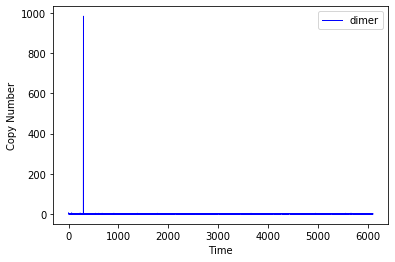

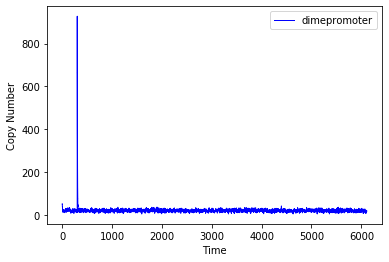

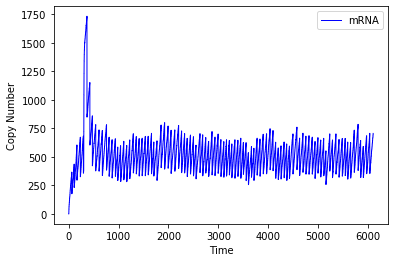

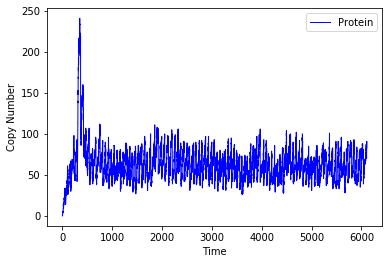

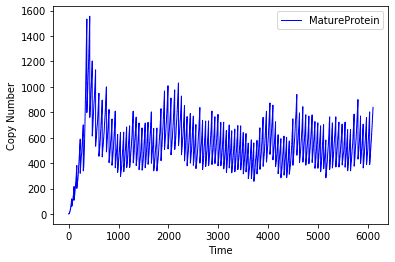

In [21]:
### 2: Do long simulation for probability density function of protein copy numbers ###
N_GENERATIONS = 100
CELL_DIVISION_TIMES = abs(np.random.gamma(T_GENERATION,1,size=N_GENERATIONS)) 
smod.DoStochSim(end=CELL_DIVISION_TIMES[0],mode='time',trajectories=1)
doSequentialSim(smod,N_GENERATIONS,CELL_DIVISION_TIMES)
smod.PlotSpeciesTimeSeries(species2plot=['dimer'])
smod.PlotSpeciesTimeSeries(species2plot=['dimepromoter'])
smod.PlotSpeciesTimeSeries(species2plot=['mRNA'])
smod.PlotSpeciesTimeSeries(species2plot=['Protein'])
smod.PlotSpeciesTimeSeries(species2plot=['MatureProtein'])

simulation with kd, k2, k3 = 1 ,  1 ,  0.1
done
simulation with kd, k2, k3 = 1 ,  1 ,  0.5
done
simulation with kd, k2, k3 = 1 ,  1 ,  1
done
simulation with kd, k2, k3 = 1 ,  10 ,  0.1
done
simulation with kd, k2, k3 = 1 ,  10 ,  0.5
done
simulation with kd, k2, k3 = 1 ,  10 ,  1
done
simulation with kd, k2, k3 = 1 ,  50 ,  0.1
done
simulation with kd, k2, k3 = 1 ,  50 ,  0.5
done
simulation with kd, k2, k3 = 1 ,  50 ,  1
done
simulation with kd, k2, k3 = 2.5 ,  1 ,  0.1
done
simulation with kd, k2, k3 = 2.5 ,  1 ,  0.5
done
simulation with kd, k2, k3 = 2.5 ,  1 ,  1
done
simulation with kd, k2, k3 = 2.5 ,  10 ,  0.1
done
simulation with kd, k2, k3 = 2.5 ,  10 ,  0.5
done
simulation with kd, k2, k3 = 2.5 ,  10 ,  1
done
simulation with kd, k2, k3 = 2.5 ,  50 ,  0.1
done
simulation with kd, k2, k3 = 2.5 ,  50 ,  0.5
done
simulation with kd, k2, k3 = 2.5 ,  50 ,  1
done
simulation with kd, k2, k3 = 5 ,  1 ,  0.1
done
simulation with kd, k2, k3 = 5 ,  1 ,  0.5
done
simulation with kd, k2

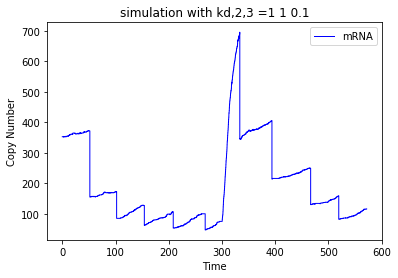

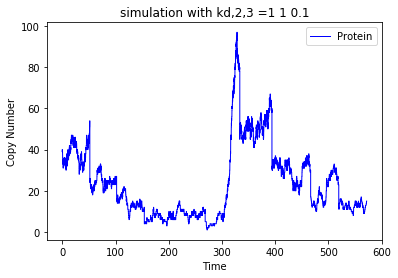

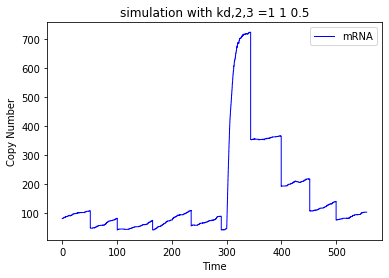

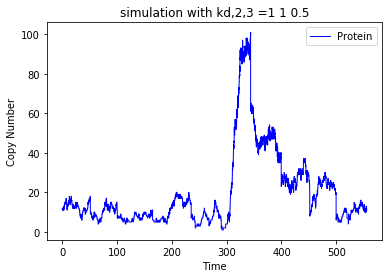

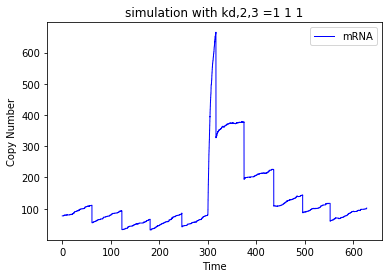

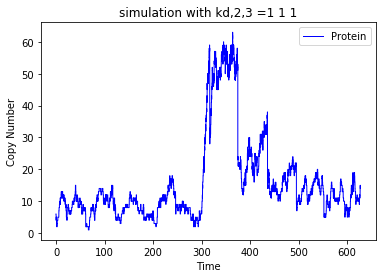

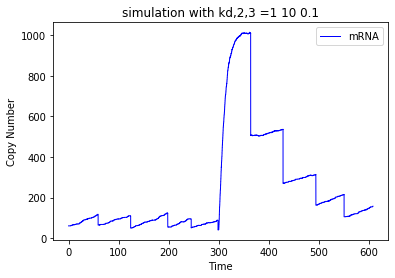

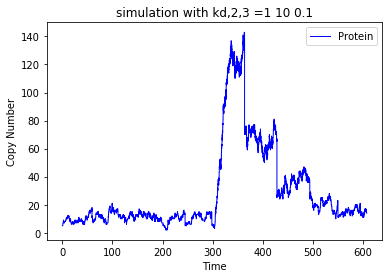

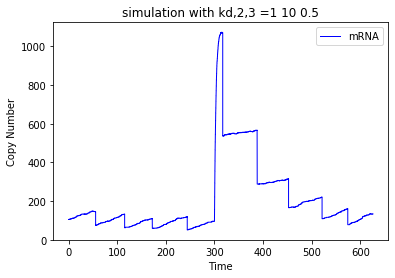

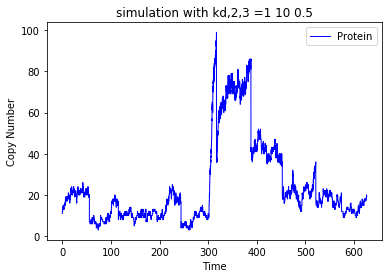

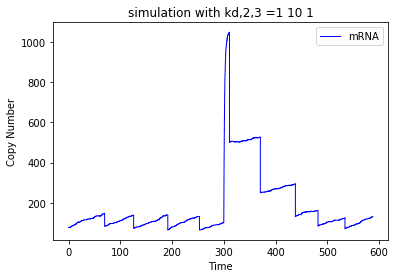

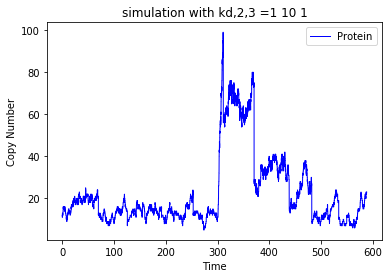

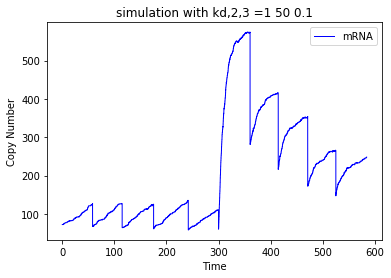

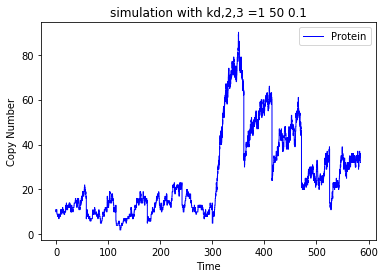

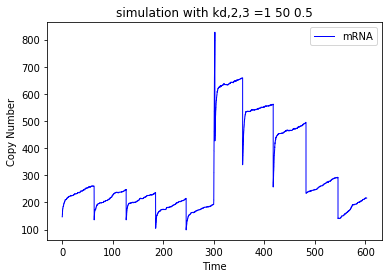

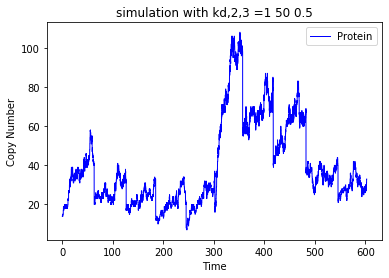

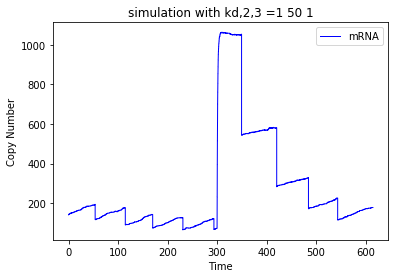

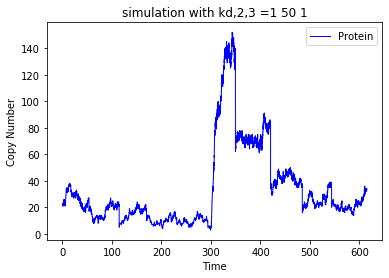

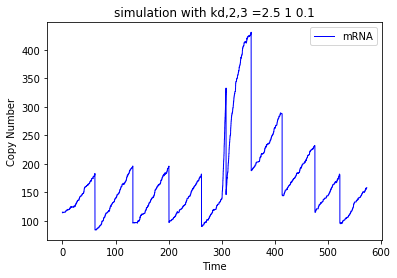

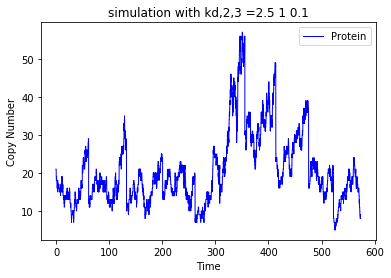

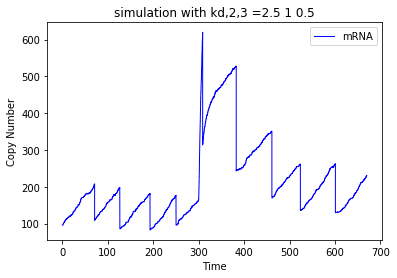

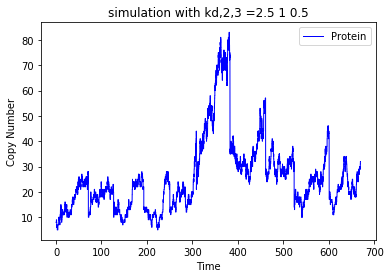

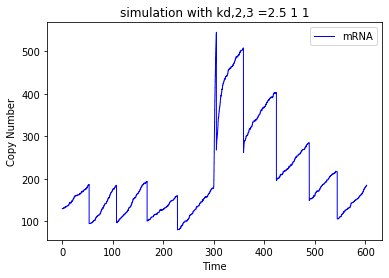

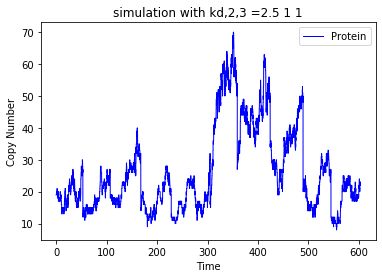

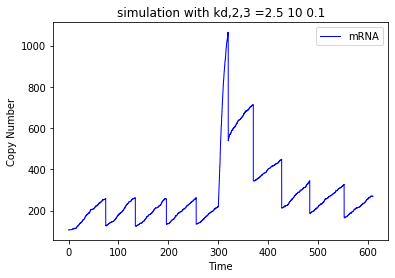

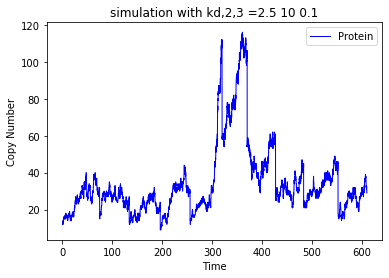

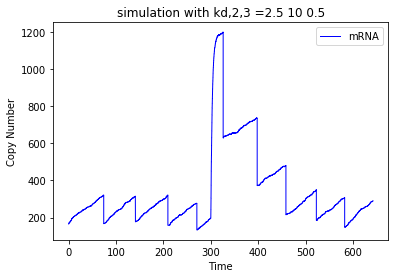

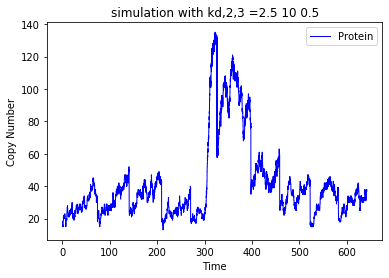

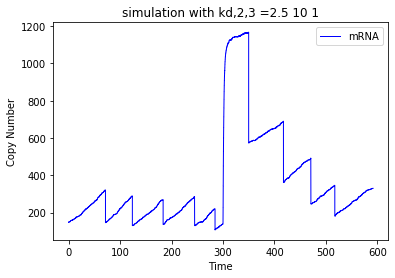

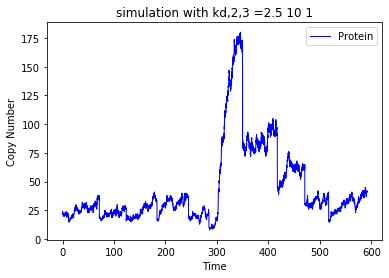

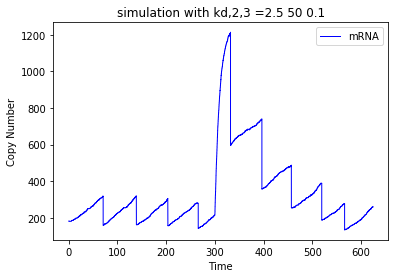

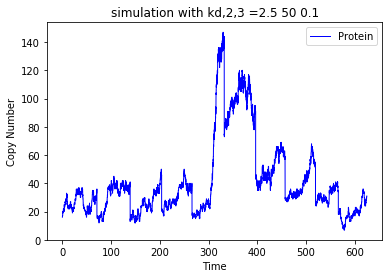

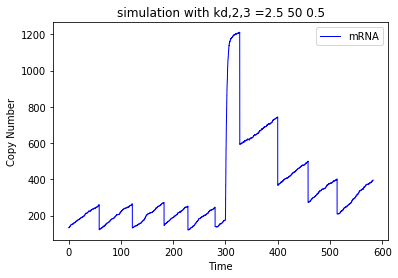

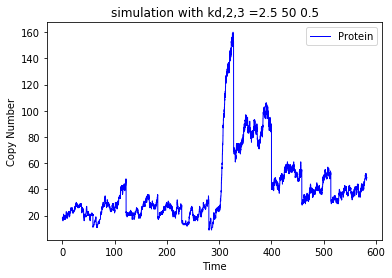

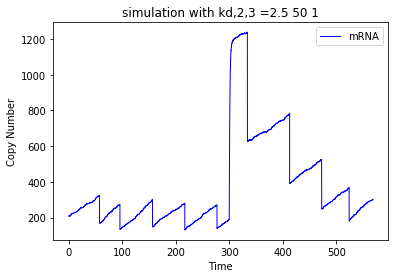

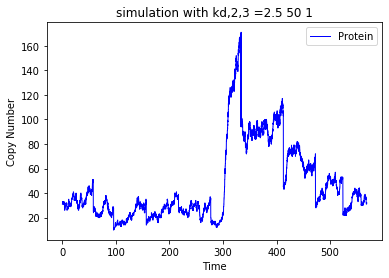

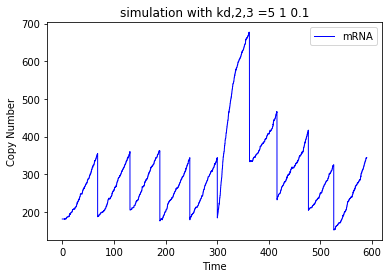

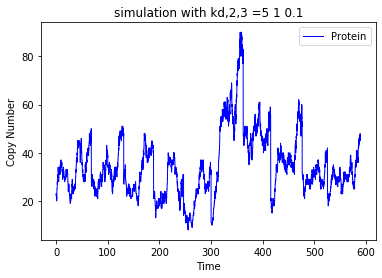

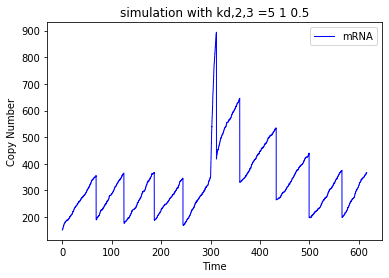

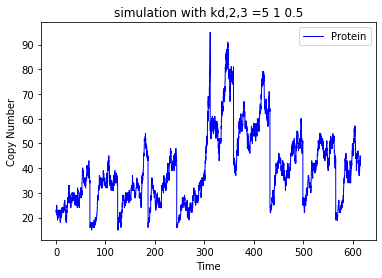

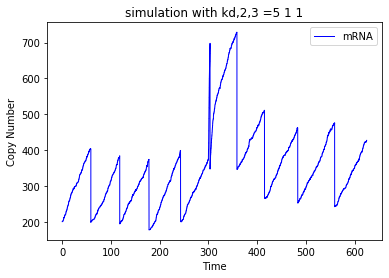

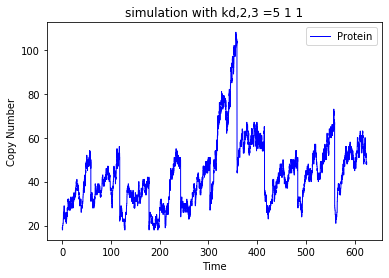

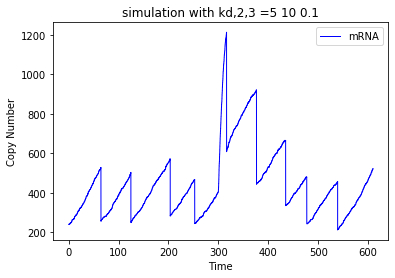

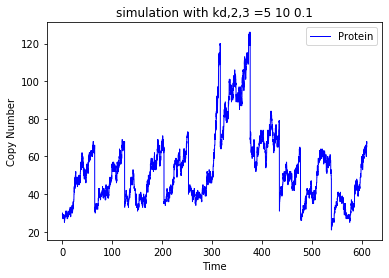

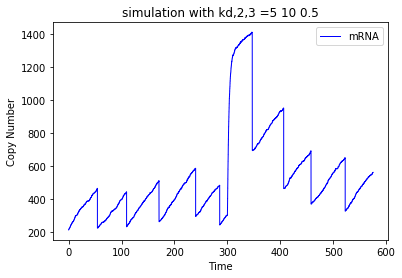

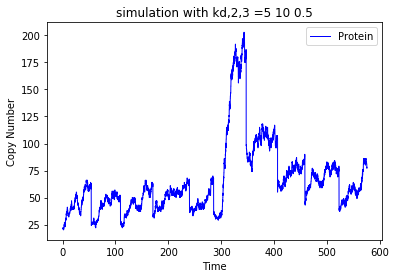

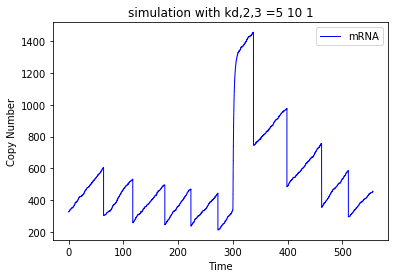

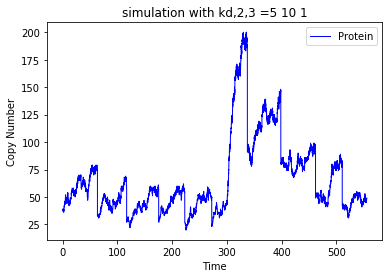

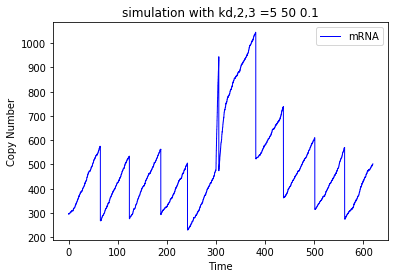

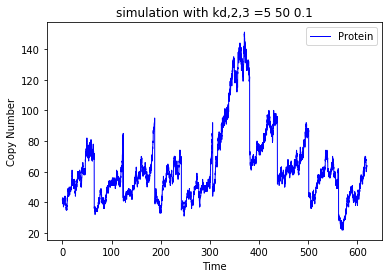

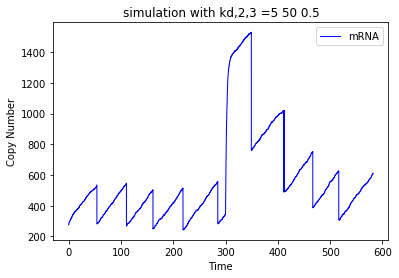

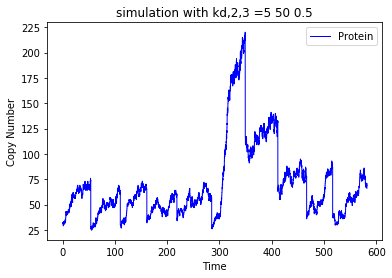

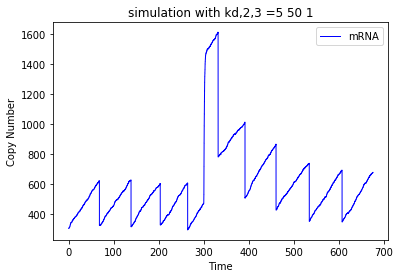

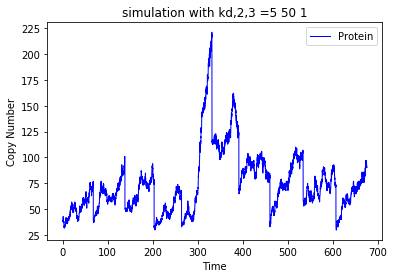

In [22]:
### 1: Do short looping simulations for a time series plot ###
kd = [1,2.5,5]
k2 = [1,10,50]
k3 = [0.1,0.5,1]
for i in kd:
  for j in k2:
    for k in k3:
      print('simulation with kd, k2, k3 =',i,', ',j,', ',k)
      graphtitle = str('simulation with kd,2,3 ='+str(i)+' '+str(j)+' '+str(k))
      smod.ChangeParameter('kd',i)
      smod.ChangeParameter('k2',j)
      smod.ChangeParameter('k3',k)
      N_GENERATIONS = 10
      CELL_DIVISION_TIMES = abs(np.random.gamma(T_GENERATION,1,size=N_GENERATIONS)) 
      smod.DoStochSim(end=CELL_DIVISION_TIMES[0],mode='time',trajectories=1)
      doSequentialSim(smod,N_GENERATIONS,CELL_DIVISION_TIMES)
      smod.PlotSpeciesTimeSeries(species2plot=['mRNA'],title=graphtitle)
      smod.PlotSpeciesTimeSeries(species2plot=['Protein'],title=graphtitle)
      print('done')

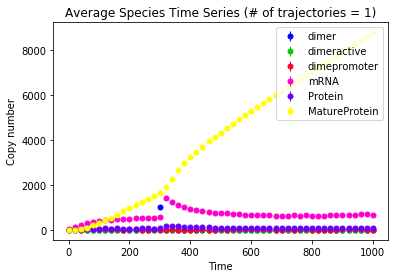

In [19]:
### Test a model with a time event
smod.Model('DBD_test.psc') 
smod.DoStochSim(trajectories=1,end=1000,mode='time')
smod.GetRegularGrid()
smod.PlotAverageSpeciesTimeSeries()